# Wstęp

MLPRegressor jest to model, który używany jest do rozwiązywania problemów regresyjnych, czyli przewiduje wartość ciągłą. Model podobnie do MLPClassifiera jako wejście przyjmuje zestaw cech, natomiast jako wyjście zamiast przypisywać wartości do jednej z klas wyjściowych poprostu przewiduje pojedyńcze wartości. (np. temperatura, cena akcji, wartość fuinkcji).

# Zadania:

## Zadanie 1:
Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, reklamową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję $Z(w_{TV}, w_{radio}, w_{prasa})$. Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci. Proszę porównać wyniki (MSE) dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące i o pilnowaniu skali danych.

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import time as tm
import itertools
from math import pi


### Wczytujemy dane z pliku

In [51]:
def_path = os.getcwd()

Data = pd.read_csv(f"{def_path}/Advertising.csv", delimiter=',', index_col=0)
Data = Data.to_numpy()

X = Data[:,0:3]
y = Data[:, -1]
print(X.shape)


(200, 3)


### Usuwamy outliery za pomocą zasady 3 sigm

In [52]:
means = X.mean(axis=0)
std = X.std(axis=0)

mask = ((X >= means - 3 * std) & (X <= means + 3 * std)).all(axis=1)
Xf = X[mask]
yf = y[mask]

### Normalizacja
Nie wykonałem normalizacji danych, ponieważ dane są w miare rozsądnych przedziałach oraz zauważyłem, iż bez normalizacji otrzymujemy nieco lepsze wyniki.

In [53]:


#scaler_X = sk.preprocessing.MinMaxScaler()
#scaler_y = sk.preprocessing.MinMaxScaler()

#Xf = scaler_X.fit_transform(Xf)
#yf = scaler_y.fit_transform(yf.reshape(-1,1)).ravel()


print(Xf.shape)

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(Xf, yf, test_size=0.2, random_state=42)

(198, 3)


### Trening
Trenujemy 8 modeli z różnymi funkcjami aktywacji oraz architekturami sieci.

In [60]:
architectures = [
    (10, 10), (100, 100), (20, 20, 20), (100, 100, 100, 100)
]
activations = ["relu", "tanh"]
result = []
for arch, activation in itertools.product(architectures, activations):
    model = sk.neural_network.MLPRegressor(hidden_layer_sizes=arch, activation=activation, max_iter=1000, tol=1e-3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mse = sk.metrics.mean_squared_error(y_test, y_pred)
    mse_train = sk.metrics.mean_squared_error(y_train, y_pred_train)
    score = model.score(X_test, y_test)
    score_t = model.score(X_train, y_train)
    result.append(
        {
            "architecture": arch,
            "activation": activation,
            "mse": mse,
            "mse_t": mse_train,
            "score": score,
            "score_t": score_t
        }
    )
for i in result:
    print(f"architecture: {i['architecture']}, activation: {i['activation']}, mse: {i['mse']:.4}, mse_train: {i['mse_t']:.4}, score: {i['score']:.4}, score_train: {i['score_t']:.4}")





/Users/maciek_gangus/PycharmProjects/MIOpack/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/maciek_gangus/PycharmProjects/MIOpack/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


architecture: (10, 10), activation: relu, mse: 2.557, mse_train: 1.428, score: 0.9057, score_train: 0.9467
architecture: (10, 10), activation: tanh, mse: 27.94, mse_train: 28.86, score: -0.0301, score_train: -0.07734
architecture: (100, 100), activation: relu, mse: 32.77, mse_train: 35.6, score: -0.2081, score_train: -0.329
architecture: (100, 100), activation: tanh, mse: 0.8472, mse_train: 0.5348, score: 0.9688, score_train: 0.98
architecture: (20, 20, 20), activation: relu, mse: 35.8, mse_train: 33.56, score: -0.3199, score_train: -0.2528
architecture: (20, 20, 20), activation: tanh, mse: 7.835, mse_train: 6.183, score: 0.7111, score_train: 0.7692
architecture: (100, 100, 100, 100), activation: relu, mse: 4.174, mse_train: 0.6159, score: 0.8461, score_train: 0.977
architecture: (100, 100, 100, 100), activation: tanh, mse: 0.791, mse_train: 0.518, score: 0.9708, score_train: 0.9807


### Wnioski
Wyniki wskazują na to, że funkcja aktywacji relu o wiele lepiej sobie radzi przy małych sieciach osiągając lepsze wyniki od takiej samej sieci z funkcją aktywacji tanh. (10,10) - relu -> 2.5 / (10,10) - tanh -> 27.9. Z moich obserwacji wynika, że sieci z funkcja aktywacji tanh potrzebuję większej ilości epok do osiągniecia równie dobrego wyniku. 
Przy większych sieciach funkcja tanh radzi sobie już znacznie lepiej niż przy małych. Dla architektury (100, 100, 100, 100) wyniki były lepsze od sieci z funkcją relu. 0.7 < 4.1.


## Zadanie 2:
Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji $f(x) = sin(x)$ w przedziale $[-2\pi,2\pi]$. Proszę użyć $tanh$ jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.

### Trening
Trenujemy model z architektórą z 10 neuronami w jednej warstwie ukrytej.

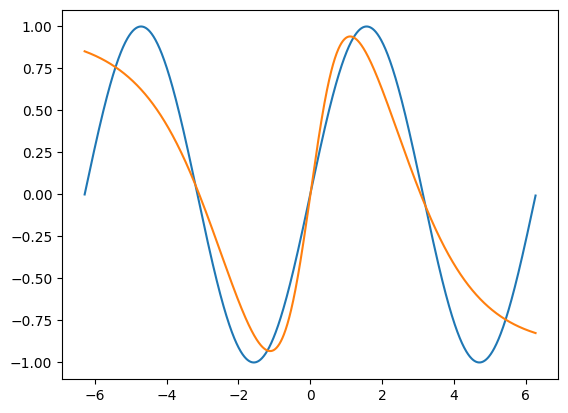

Funkcja aproksymująca: f(x) = +0.22251 * tanh(-0.28504 * x + -0.59344) -0.56343 * tanh(+0.54012 * x + 1.2933) -0.31944 * tanh(+0.3142 * x + 0.56108) -0.49208 * tanh(+0.44492 * x + -0.99518) -0.45182 * tanh(-1.136 * x + -0.096824) +0.40982 * tanh(-0.39484 * x + -0.80107) -0.82013 * tanh(-1.1658 * x + -0.067488) +0.41111 * tanh(+1.2223 * x + -0.32457) +0.23788 * tanh(+0.57045 * x + 0.090519) -0.85201 * tanh(+0.43763 * x + -0.95916) +0.032058


In [6]:
X = np.arange(-2 * pi, 2 * pi, 0.01)
y = np.sin(X)

model = sk.neural_network.MLPRegressor((10,), "tanh", max_iter=2000, random_state=42)
model.fit(X.reshape(-1,1), y)
y_pred = model.predict(X.reshape(-1,1))

plt.plot(X,y)
plt.plot(X, y_pred)
plt.show()

w0 = model.coefs_[0].ravel()
w1 = model.coefs_[1].ravel()
b0 = model.intercepts_[0]
b1 = model.intercepts_[1][0]
terms = []


res = [f"{w1[i]:+.5} * tanh({w0[i]:+.5} * x + {b0[i]:.5})" for i in range(len(w0))]

formula = " ".join(res)
formula += f" {b1:+.5}"

print(f"Funkcja aproksymująca: f(x) = {formula}")


### Wnioski
Po narysowaniu funkcji widać, że przybliżenie, które uzyskaliśmy jest całkiem niezłym przybliżeniem. Warto zwrócić uwagę na to, że mimo, że ksztąłt funkcji jest w miarę podobny to wartości funkcji aproksymowanej od aproksymującej rzadko się pokrywają. W moim przypadku poza dwoma punktami na granicach przedziałów jedynie miejsca zerowe zostały dobrze przewidziane, a tak to większość wartości różni się od dokładnych.

## Zadanie 3:
Proszę o wykorzystanie rzeczywistego zbioru danych medycznych (`diabetes`) z biblioteki `sklearn.datasets` (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), w którym celem jest przewidywanie stopnia zaawansowania choroby cukrzycowej na podstawie zestawu cech opisujących pacjenta. Proszę przeskalować dane do jednej skali i podzielić je na dane uczące i testujące. Proszę zaproponować co najmniej 5 różnych architektur sieci neuronowych, dla każdej z nich policzyć wyniki za pomocą MSE, MAPE i R^2. Dla najlepszego modelu proszę wykonać wykres porównujący wartości rzeczywiste (na osi X) i przewidywane (na osi Y). W idealnym przypadku powinny ułożyć się na prostej y=x.

Proszę skomentować, jak architektura sieci wpływa na aproksymację i zaproponować najmniejszą sieć, dla której wyniki są dla państwa zadowalające.

### Import danych
Importujemy dane za pomocą `load_diabetes`

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
Xf = data.data
yf = data.target



### Normalizacja
Normalizujemy za pomocą MinMaxScalera. Testowałem również brak normalizacji oraz normalizacje za pomocą StandardScalera i przy MinMax uzyskałem najlepsze wyniki.

In [6]:
scaler_X = sk.preprocessing.MinMaxScaler()
#scaler_y = sk.preprocessing.MinMaxScaler()

Xf = scaler_X.fit_transform(Xf, yf)
#yf = scaler_y.fit_transform(y.reshape(-1,1)).ravel()

In [7]:
#scaler_X_standard = sk.preprocessing.StandardScaler()
#scaler_Y_standard = sk.preprocessing.StandardScaler()

#Xf = scaler_X_standard.fit_transform(Xf)
#yf = scaler_Y_standard.fit_transform(y.reshape(-1,1)).ravel()


### Trening 
Model trenujemy dla 5 różnych architektur sieci.

In [9]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    Xf, yf, train_size=0.8
)

architectures = [(10,), (100,), (10,10), (20, 20, 20), (100,100,100), (500, 500, 500, 500),]
result =[]
for arch in architectures:
    model = sk.neural_network.MLPRegressor(arch, max_iter= 30_000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    mse = sk.metrics.mean_squared_error(y_test, y_pred)
    mse_t = sk.metrics.mean_squared_error(y_train, y_pred_train)
    mape = sk.metrics.mean_absolute_percentage_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)
    r2_t = model.score(X_train, y_train)

    
    result.append({
        'arch': arch,
        'mse': mse,
        'mse_train': mse_t,
        'mape': mape,
        'r2': r2,
        'r2_train': r2_t,
        'model': model,
        
    })
for i in result:
    print(f"Arch: {i['arch']}\tMSE: {i['mse']:.4}\t MSE_T: {i['mse_train']:.4}\tMAPE: {i['mape']:.4}\t R2: {i['r2']:.4}\t R2_T: {i['r2_train']:.4}\t Iter_count: {i['model'].n_iter_}")

Arch: (10,)	MSE: 2.981e+03	 MSE_T: 2.867e+03	MAPE: 0.3936	 R2: 0.5208	 R2_T: 0.5102	 Iter_count: 6644
Arch: (100,)	MSE: 3.245e+03	 MSE_T: 2.571e+03	MAPE: 0.4182	 R2: 0.4784	 R2_T: 0.5606	 Iter_count: 7581
Arch: (10, 10)	MSE: 3.306e+03	 MSE_T: 2.645e+03	MAPE: 0.4192	 R2: 0.4686	 R2_T: 0.5481	 Iter_count: 4731
Arch: (20, 20, 20)	MSE: 3.004e+03	 MSE_T: 2.852e+03	MAPE: 0.3966	 R2: 0.5171	 R2_T: 0.5127	 Iter_count: 1188
Arch: (100, 100, 100)	MSE: 3.508e+03	 MSE_T: 2.319e+03	MAPE: 0.4124	 R2: 0.436	 R2_T: 0.6037	 Iter_count: 1154
Arch: (500, 500, 500, 500)	MSE: 4.31e+03	 MSE_T: 1.624e+03	MAPE: 0.4826	 R2: 0.3072	 R2_T: 0.7225	 Iter_count: 323


### Wyniki
Najlepszy wynik udało się uzyskać dla architektury z 10 neuronami w jednej warstwie. Dla tej architektury nie widać oznak przeuczenia, czegop nie można powiedzieć o dwóch ostatnich architekturach, gdzie przeuczenie jest znaczące. R2_T>>R2.

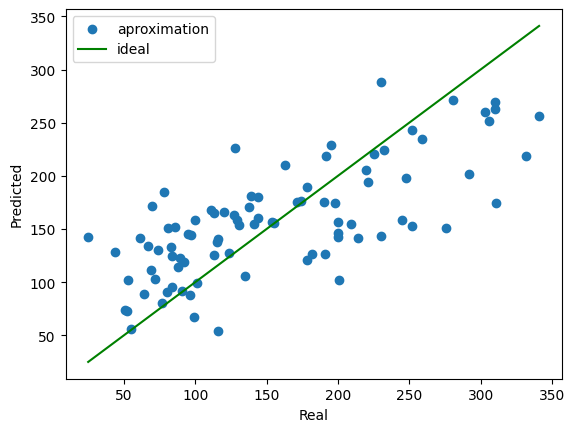

In [10]:
b_model = result[0]['model']
y_pred_b = b_model.predict(X_test)
plt.scatter(y_test,y_pred_b, label="aproximation")

plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], label = "ideal", color ="g")
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.legend()
plt.show()

## Zadanie 4:
Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz dwóch wybranych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.

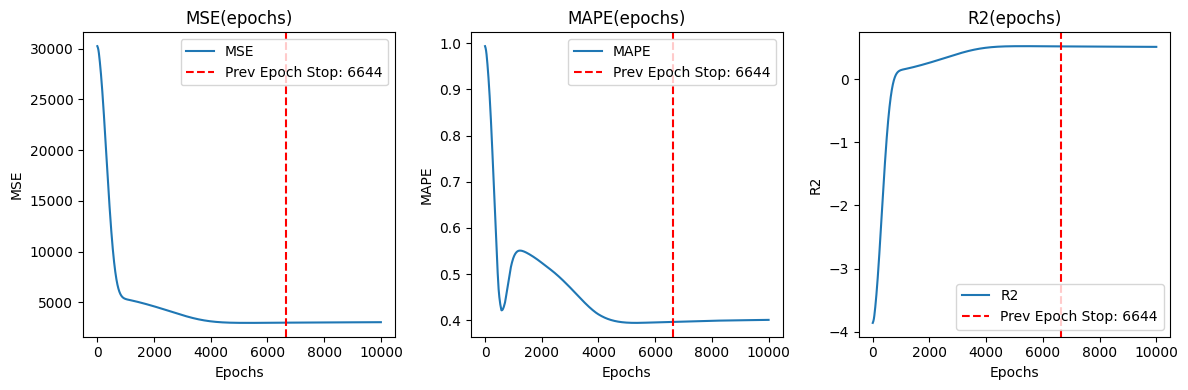

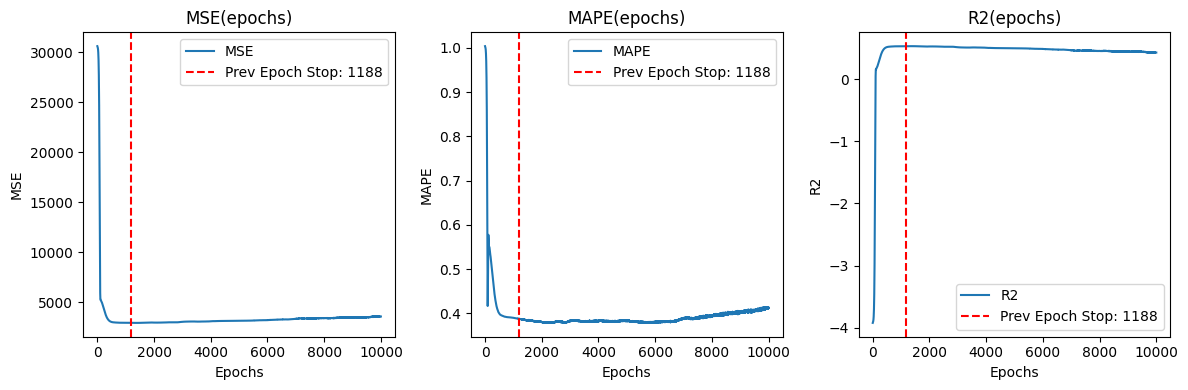

In [11]:
prev_epoch = result[0]['model'].n_iter_
max_epochs = 10_000
for arch in [((10,), 0), ((20, 20, 20), 3)]:
    model = sk.neural_network.MLPRegressor(arch[0], max_iter=max_epochs, random_state=23, early_stopping=False)
    prev_epoch = result[arch[1]]['model'].n_iter_
    epochs = []
    mse = []
    mape = []
    r2 = []
    
    for epoch in range(max_epochs):
        model.partial_fit(X_train, y_train)
        epochs.append(epoch)
        
        y_pred = model.predict(X_test)
        mse.append(sk.metrics.mean_squared_error(y_test, y_pred))
        mape.append(sk.metrics.mean_absolute_percentage_error(y_test, y_pred))
        r2.append(model.score(X_test, y_test))
        
    fig, ax = plt.subplots(1,3, figsize=(12,4))
    
    ax[0].plot(epochs, mse, label="MSE")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("MSE")
    ax[0].set_title("MSE(epochs)")
    ax[0].axvline(x=prev_epoch, color='r', linestyle='--', label=f'Prev Epoch Stop: {prev_epoch}') 
    ax[0].legend()
    
    
    ax[1].plot(epochs, mape, label="MAPE")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("MAPE")
    ax[1].set_title("MAPE(epochs)")
    ax[1].axvline(x=prev_epoch, color='r', linestyle='--', label=f'Prev Epoch Stop: {prev_epoch}') 
    ax[1].legend()
    
    ax[2].plot(epochs, r2, label="R2")
    ax[2].set_xlabel("Epochs")
    ax[2].set_ylabel("R2")
    ax[2].set_title("R2(epochs)")
    ax[2].axvline(x=prev_epoch, color='r', linestyle='--', label=f'Prev Epoch Stop: {prev_epoch}') 
    ax[2].legend()
    
    plt.tight_layout()
    plt.show()

    
    
    



### Wnioski
Narysowałem po 3 wykresy dla 2 architektur kolejno ((10,) i (20, 20, 20). Czerwoną linią zaznaczono ilosć epok potrzebnych do zbieżności modelu według domyślnej toleracji. Z wykresów można zauważyć, że:
- Większa sieć potrzebuje mniej epok aby uzyskać dobry wynik
- Wraz ze sztucznym wzrostem epok uzyskujemy coraz gorsze wyniki